# Breakout Exercise 20250227 - Room 2

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1 - Load Dataset

In [16]:
df = pd.read_csv('CC GENERAL.csv')
df_orig = df.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Step 2 - Check for null values and handle those values

In [17]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [18]:
df.shape

(8950, 18)

In [19]:
df.dropna(inplace=True)
df.shape

(8636, 18)

In [20]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X = df.drop(columns=['CUST_ID'], axis=1)

In [21]:

X_scaled = std_scaler.fit_transform(X)
X_scaled

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]], shape=(8636, 17))

## Step 4a - Perform PCA with all of the columns

In [22]:
from sklearn.decomposition import PCA

pca_model = PCA()
X_scaled_pca = pca_model.fit(X_scaled)
X_scaled

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]], shape=(8636, 17))

## Step 4b - Plot number of components versus PCA cumulative explained variance

In [23]:
pca_evr = pca_model.explained_variance_ratio_

# Calculate running total
pca_evr_cumsum = np.cumsum(pca_evr)
pca_evr_cumsum

array([0.27231177, 0.47605485, 0.56523818, 0.64097427, 0.70374045,
       0.76086831, 0.81003019, 0.85213753, 0.8889545 , 0.91976958,
       0.94340762, 0.96115301, 0.97542011, 0.98720671, 0.99728768,
       0.99999931, 1.        ])

In [24]:
df_pca_evr = pd.DataFrame({'Principal Component':range(1,18),
                           'PCA_EVR': pca_evr,
                           'PCA_EVR_CumSum':pca_evr_cumsum
                           })
df_pca_evr

,Principal Component,PCA_EVR,PCA_EVR_CumSum
0,1,2.723118e-01,0.272312
1,2,2.037431e-01,0.476055
2,3,8.918334e-02,0.565238
3,4,7.573609e-02,0.640974
4,5,6.276618e-02,0.703740
5,6,5.712786e-02,0.760868
6,7,4.916188e-02,0.810030
7,8,4.210734e-02,0.852138
8,9,3.681697e-02,0.888955
9,10,3.081508e-02,0.919770


Text(0, 0.5, 'Explained Variance Ratio')

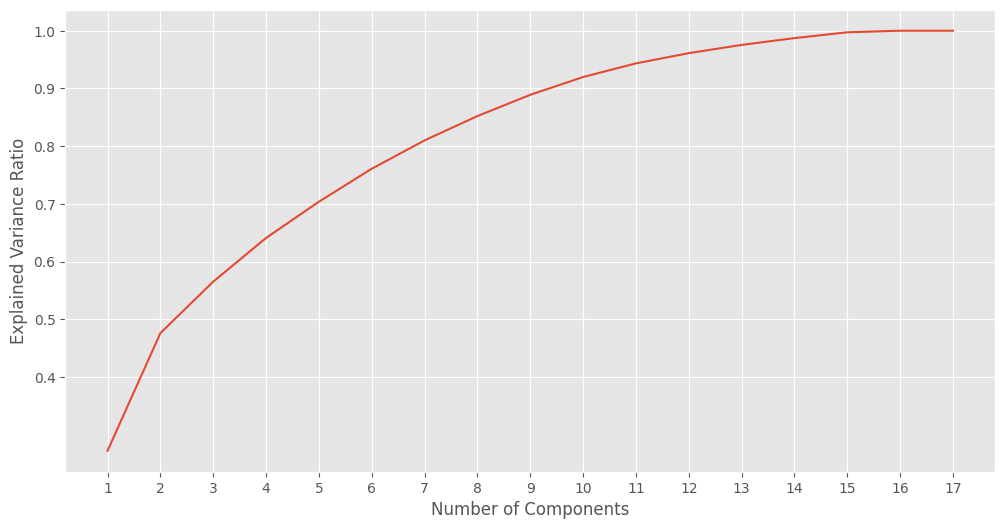

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.plot(df_pca_evr['Principal Component'], df_pca_evr['PCA_EVR_CumSum'])
plt.xticks(df_pca_evr['Principal Component'])
plt.yticks(np.arange(0.4, 1.1, 0.1))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

### Observations
- We reach 85% at 8 PCs

## Step 5 - Perform PCA with 2 components, with the aim of visualizing clustering.

In [26]:
pca_2_model = PCA(n_components=2)
X_scaled_2_model = pca_2_model.fit(X_scaled)

## Step 6: Find the two columns which give the most covariances

In [27]:
X_scaled_2_loadings = X_scaled_2_model.components_
X_scaled_2_loadings
loadings_matrix = pd.DataFrame(X_scaled_2_loadings, columns=X.columns)
loadings_matrix = loadings_matrix.T
loadings_matrix.columns = ['PC 1', 'PC 2']
loadings_matrix


,PC 1,PC 2
BALANCE,0.091986,0.405979
BALANCE_FREQUENCY,0.109812,0.127739
PURCHASES,0.412151,0.049530
ONEOFF_PURCHASES,0.346775,0.069930
INSTALLMENTS_PURCHASES,0.337056,-0.011481
CASH_ADVANCE,-0.030588,0.437247
PURCHASES_FREQUENCY,0.323665,-0.186582
ONEOFF_PURCHASES_FREQUENCY,0.294761,-0.014747
PURCHASES_INSTALLMENTS_FREQUENCY,0.277226,-0.173577
CASH_ADVANCE_FREQUENCY,-0.099145,0.429997


In [28]:
top_2_loadings = loadings_matrix.apply(lambda x: x.abs().nlargest(2).index)
top_2_loadings

,PC 1,PC 2
0,PURCHASES,CASH_ADVANCE
1,PURCHASES_TRX,CASH_ADVANCE_FREQUENCY


### Observations
- PURCHASES and PURCHASES_TRX have the most influence on PC 1
- CASH and CASH_ADVANCE_FREQUENCY have the most influence on PC 2

## Step 7: Perform K Means Clustering on the 2 component PCA transformed data with clusters ranging from 2 to 11 and plot the K Means inertia against the number of clusters (Elbow Method). From the elbow plot, identify the ideal required number of clusters.

<Axes: >

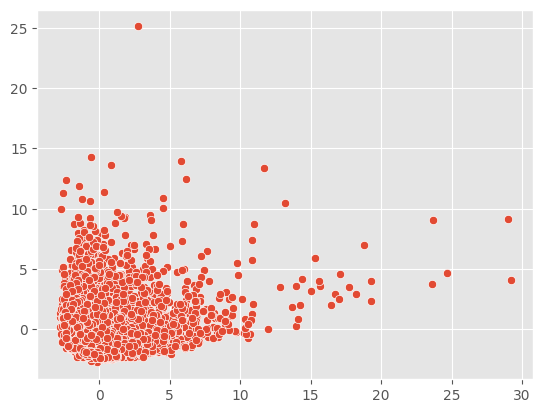

In [29]:
X_scaled_2_data = pca_2_model.fit_transform(X_scaled)
X_scaled_2_data
sns.scatterplot(x=X_scaled_2_data[:,0], y=X_scaled_2_data[:,1])

In [30]:
from sklearn.cluster import KMeans

wcss_list, k_value_list = [], range(2,12)

for k_val in k_value_list:
    # Build the model
    kmeans_model = KMeans(k_val, random_state=10)
    kmeans_model.fit(X_scaled_2_data)
    
    # Calculate WCSS value
    wcss_val = kmeans_model.inertia_

    wcss_list.append(wcss_val)
    # log
    print(f"k-means model with k = {k_val}: WCSS Value = {wcss_val}")

k-means model with k = 2: WCSS Value = 51107.98936109783
k-means model with k = 3: WCSS Value = 31904.914465162845
k-means model with k = 4: WCSS Value = 23721.5783606493
k-means model with k = 5: WCSS Value = 18760.60070762802
k-means model with k = 6: WCSS Value = 17017.872652103626
k-means model with k = 7: WCSS Value = 14122.804715898137
k-means model with k = 8: WCSS Value = 11877.320803387778
k-means model with k = 9: WCSS Value = 10526.914291115274
k-means model with k = 10: WCSS Value = 9611.903057788819
k-means model with k = 11: WCSS Value = 8815.603326722723


Text(0, 0.5, 'WCSS Value')

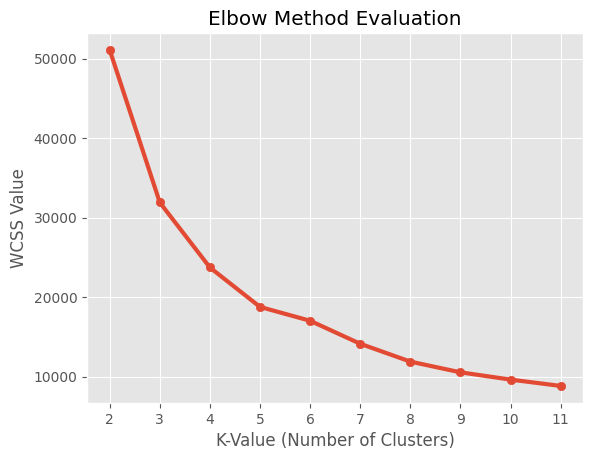

In [35]:
plt.plot(k_value_list, wcss_list, linewidth=3)
plt.scatter(k_value_list, wcss_list)
plt.xticks(k_value_list)

point_x = 5
point_y = wcss_list[point_x-1]

#add annotation

plt.title('Elbow Method Evaluation')
plt.xlabel('K-Value (Number of Clusters)')
plt.ylabel('WCSS Value')

### Observations
- The curve starts to flatten out around 8

## Step 8. K-means clustering at 8 clusters

In [42]:
kmeans_model = KMeans(n_clusters=8, random_state=10)
X_scaled_2_df = pd.DataFrame(X_scaled_2_data, columns=['PC 1', 'PC 2'])
X_scaled_2_df['Cluster'] = kmeans_model.fit_predict(X_scaled_2_data)
X_scaled_2_df

,PC 1,PC 2,Cluster
0,-1.696395,-1.122584,0
1,-1.215681,2.435638,5
2,0.935853,-0.385202,4
3,-1.614638,-0.724586,0
4,0.223701,-0.783610,4
...,...,...,...
8631,-2.221637,-1.328411,0
8632,-0.362326,-2.032249,4
8633,-0.930026,-1.841236,4
8634,-2.356010,-0.718730,0


Text(0, 0.5, 'PC 2')

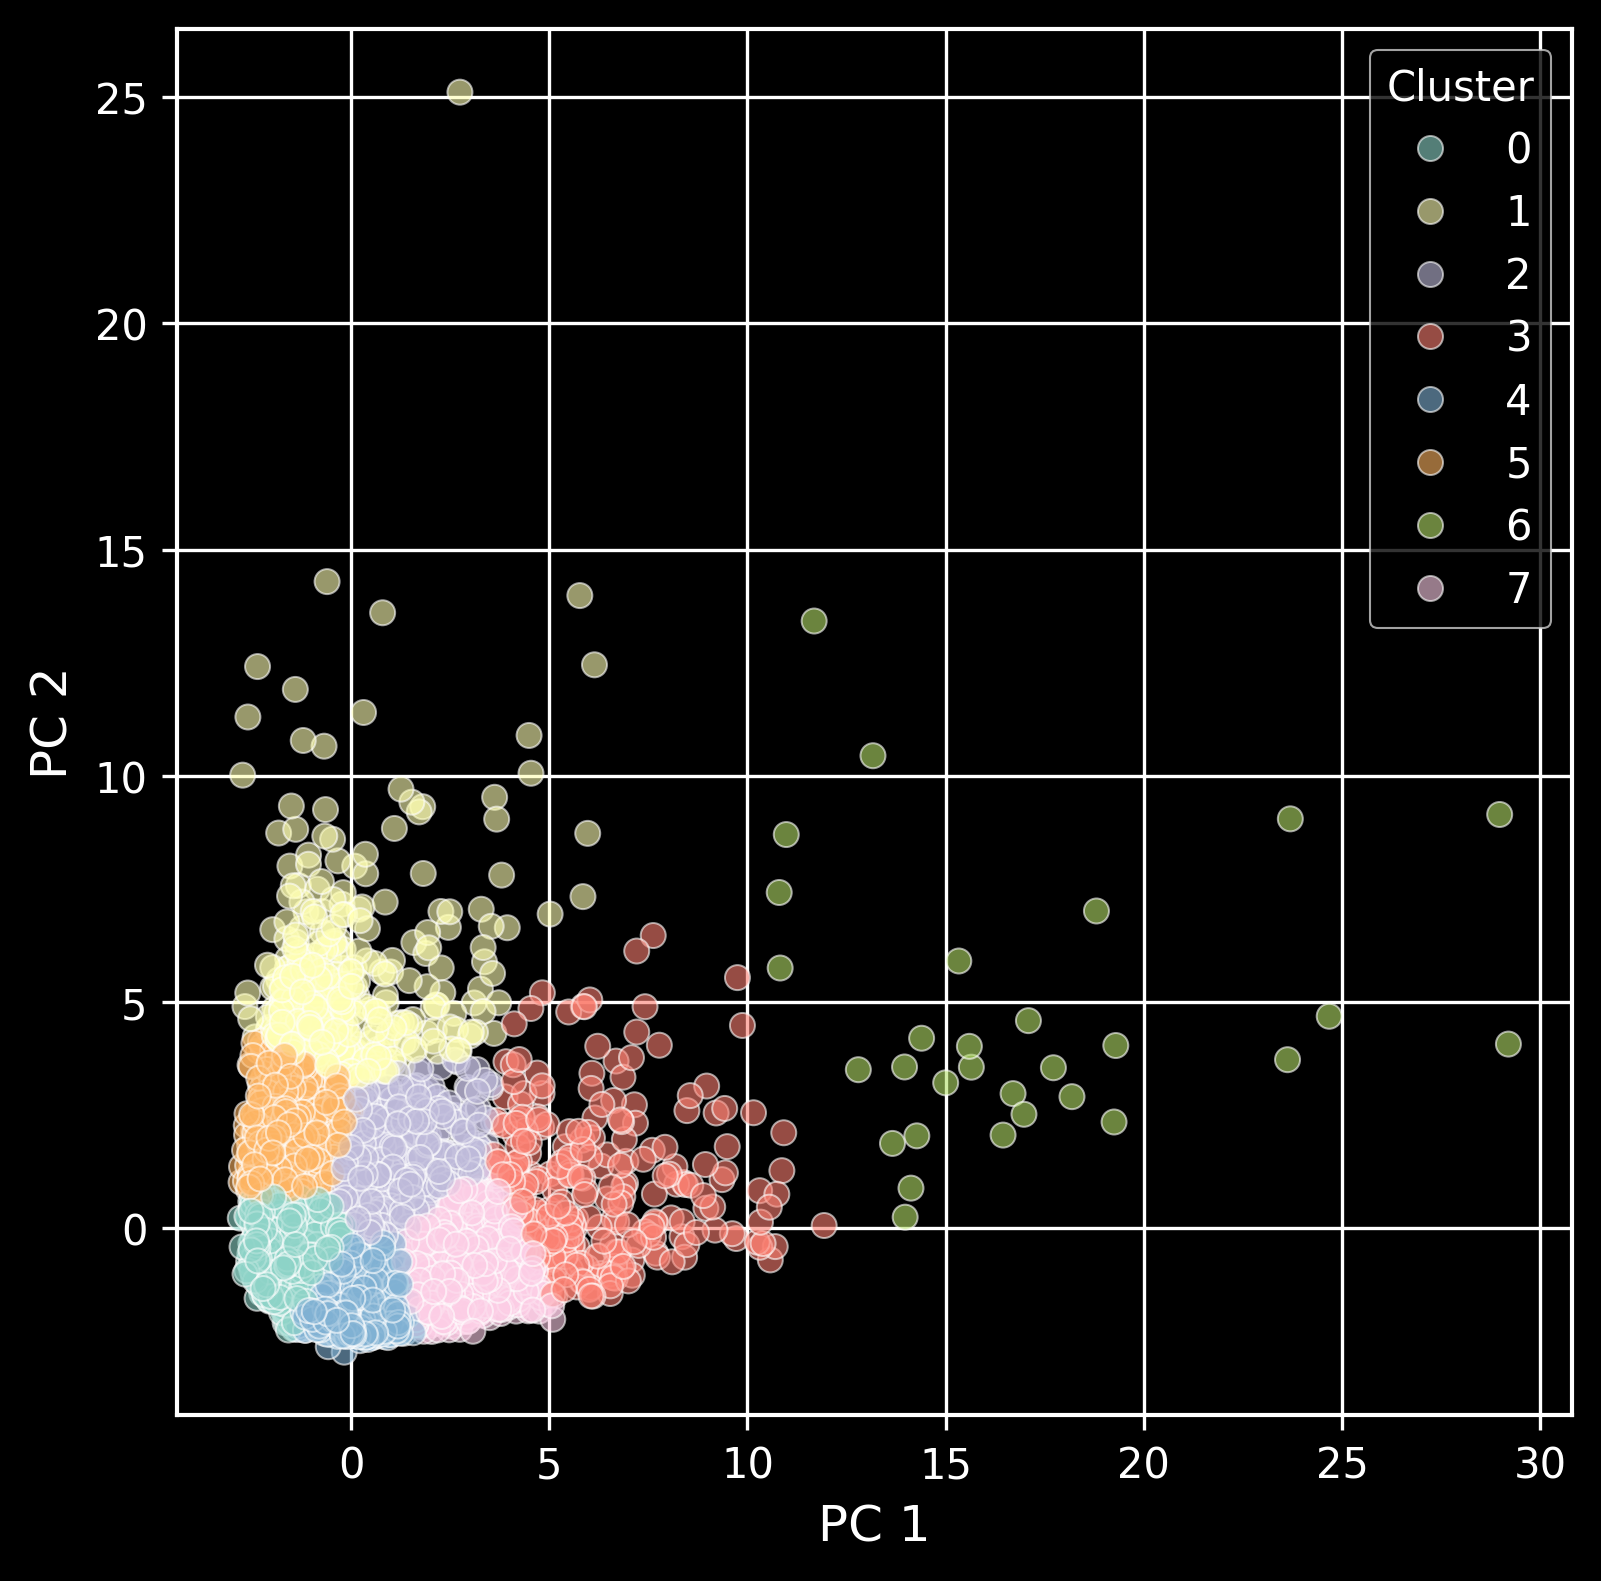

In [45]:
plt.style.use('dark_background')
plt.figure(figsize=(6,6), dpi=300)

#data points
sns.scatterplot(x=X_scaled_2_df['PC 1'], y=X_scaled_2_df['PC 2'], alpha=0.6, hue=X_scaled_2_df['Cluster'], palette='Set3')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
